In [1]:
#Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

#Biblioteca de visualização de plots
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas resposnsáveis pelo Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from itertools import cycle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/DarkMatter/dataset_criancas_V3.csv') #Dataset que será utilizado

In [ ]:
df.head(5) #Primeiras 5 linhas do dataset

,qseqid,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,...,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157,taxname
0,NODE_563_length_2462_cov_2477.158491,2462,36.83,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Enterovirus
1,NODE_5193_length_554_cov_20.345912,554,31.23,0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,RSV
2,NODE_531_length_2579_cov_6.050759,2579,32.29,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
3,NODE_492_length_2724_cov_8.943332,2724,31.90,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
4,NODE_3608_length_1124_cov_17.769819,1124,56.49,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,TTV


In [ ]:
df = df.drop('qseqid',axis =1) #retirar coluna dos IDs
df.head()

,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,TT_ORF1,...,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157,taxname
0,2462,36.83,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Enterovirus
1,554,31.23,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,RSV
2,2579,32.29,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
3,2724,31.90,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
4,1124,56.49,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,TTV


In [ ]:
df[['length', 'GC']].describe() #Explorar variáveis numéricas

,length,GC
count,97.000000,97.000000
mean,11022.237113,42.867629
std,11803.290804,7.370888
min,525.000000,31.230000
25%,3729.000000,38.000000
50%,7069.000000,39.730000
75%,15212.000000,50.870000
max,43429.000000,56.490000


In [ ]:
print("Shape of the Dataset: {}".format(df.shape))
#linhas x colunas

Shape of the Dataset: (97, 40)


Text(0, 0.5, 'Contagem')

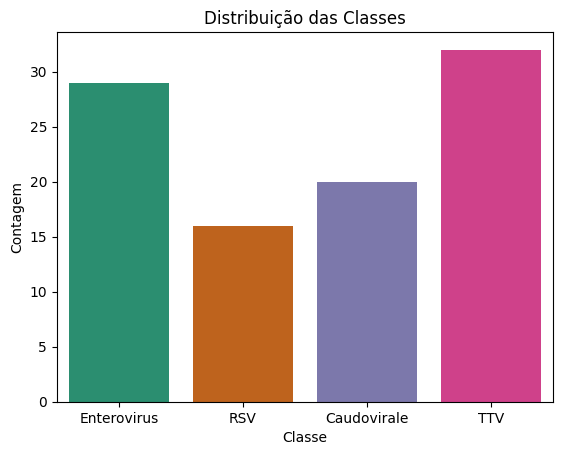

In [ ]:
#Distribuição das Classes

sns.countplot(data=df, x = 'taxname', hue = 'taxname', palette="Dark2")
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Contagem")

In [ ]:
numeric_features = df.iloc[:,0:2]
numeric_features

,length,GC
0,2462,36.83
1,554,31.23
2,2579,32.29
3,2724,31.90
4,1124,56.49
...,...,...
92,40535,39.71
93,43429,40.87
94,39878,39.49
95,19343,38.08


In [ ]:
max = numeric_features.max()
min = numeric_features.min()
print(max, min)

length    43429.00
GC           56.49
dtype: float64 length    525.00
GC         31.23
dtype: float64


In [ ]:
#Normalização Min-Max
for column in numeric_features.columns:
    numeric_features[column] = (numeric_features[column] - numeric_features[column].min()) / (numeric_features[column].max() - numeric_features[column].min())
print(numeric_features)

      length        GC
0   0.045147  0.221694
1   0.000676  0.000000
2   0.047874  0.041964
3   0.051254  0.026524
4   0.013961  1.000000
..       ...       ...
92  0.932547  0.335709
93  1.000000  0.381631
94  0.917234  0.326999
95  0.438607  0.271180
96  0.821858  0.310372

[97 rows x 2 columns]


<Axes: >

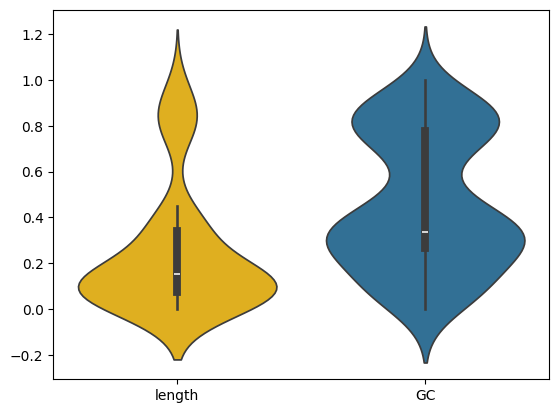

In [ ]:
#Violin Plot
col = ["#FFBF00", "#2274A5"]
sns.violinplot(data = numeric_features, palette = col)

<Axes: xlabel='GC', ylabel='taxname'>

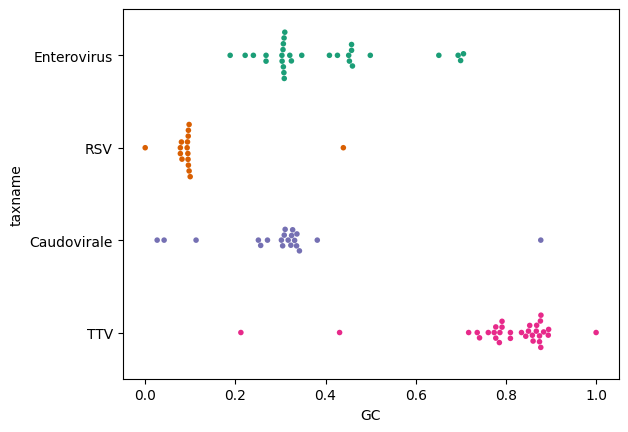

In [ ]:
#Swarm plot
numeric_features = numeric_features.join(df['taxname'])
sns.swarmplot(data=numeric_features, y="taxname", x = "GC", hue = 'taxname', palette = "Dark2", size = 4)

Text(37.722222222222214, 0.5, 'Comprimento contig')

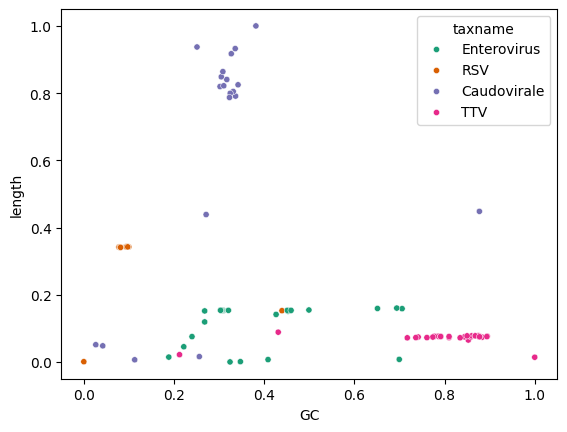

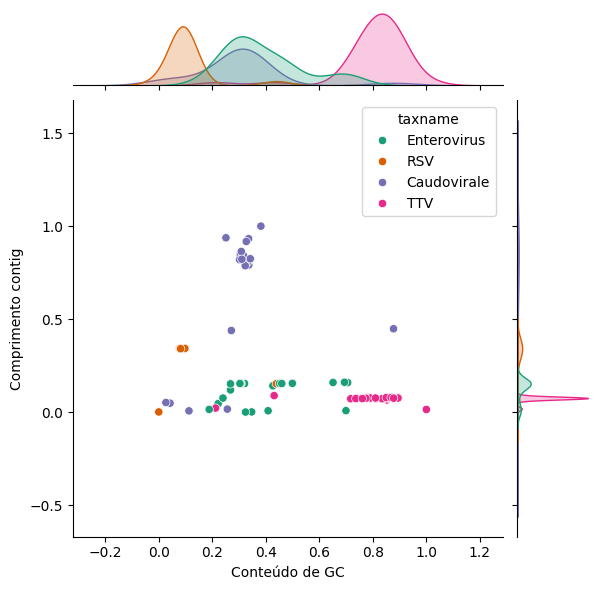

In [ ]:
#df['log_length'] = np.log(df['length'])
sns.scatterplot(data=numeric_features, x = 'GC', y = 'length',
                hue = 'taxname', marker ='o', s = 20, palette = "Dark2")
plot = sns.jointplot(data=numeric_features, x="GC", y="length", hue = 'taxname', palette = "Dark2") #Investigar correlação
plt.xlabel("Conteúdo de GC")
plt.ylabel("Comprimento contig")

In [ ]:
# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

y = df['taxname']

# Ajustar e transformar os labels
y_encoded = label_encoder.fit_transform(y)

# Agora 'y_encoded' contém os labels numéricos
print("Labels originais:\n", y)
print("Labels codificados numericamente:", y_encoded)

Labels originais:
 0     Enterovirus
1             RSV
2     Caudovirale
3     Caudovirale
4             TTV
         ...     
92    Caudovirale
93    Caudovirale
94    Caudovirale
95    Caudovirale
96    Caudovirale
Name: taxname, Length: 97, dtype: object
Labels codificados numericamente: [1 2 0 0 3 3 1 1 1 1 1 1 1 1 0 0 0 3 2 2 2 2 2 1 1 2 1 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 1 1 1 1 1 1 1 1 3 3 2 2 3 3 1 1 1 2 3 2 2 2 2 2 3 1 1 2 1 3 3 3 3
 3 3 3 1 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
(97*25)/100

24.25

In [ ]:
# Segregating the Feature and Target

#df = df.drop('log_length',axis =1)
X = df.drop("taxname", axis=1)
#y = label_encoder.fit_transform(y)
y = df['taxname']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (72, 39)
Shape of Test Features: (25, 39)
Shape of Train Target: (72,)
Shape of Test Target: (25,)


In [ ]:
#X_train.columns
names=df.drop("taxname", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['length' 'GC' 'Pico_P2A' 'Fusion_gly' 'DNA_ligase_aden' 'DNA_ligase_OB'
 'divDNApol' 'DNA_pol_B' 'TT_ORF2' 'TT_ORF1' 'P3A' 'Peptidase_C3'
 'Pico_P2B' 'RdRP_1' 'Rhv' 'RNA_helicase' 'RdRP_2' 'RdRP_4' 'Pico_P1A'
 'AAA_16' 'DNA_pol_B_exo1' 'DUF3987' 'ResIII' 'SNF2-rel_dom' 'Pneumo_NS1'
 'Pneumo_matrix' 'Pneumo_phosprot' 'Pneumo_ncap' 'Glycoprotein_G'
 'Mononeg_RNA_pol' 'Pneumovirus_M2' 'RSV_NS2' 'zf-CCCH_2' 'DUF755'
 'Calici_coat' 'TMP_3' 'DUF4355' 'Baculo_PEP_C' 'Sipho_Gp157 ']


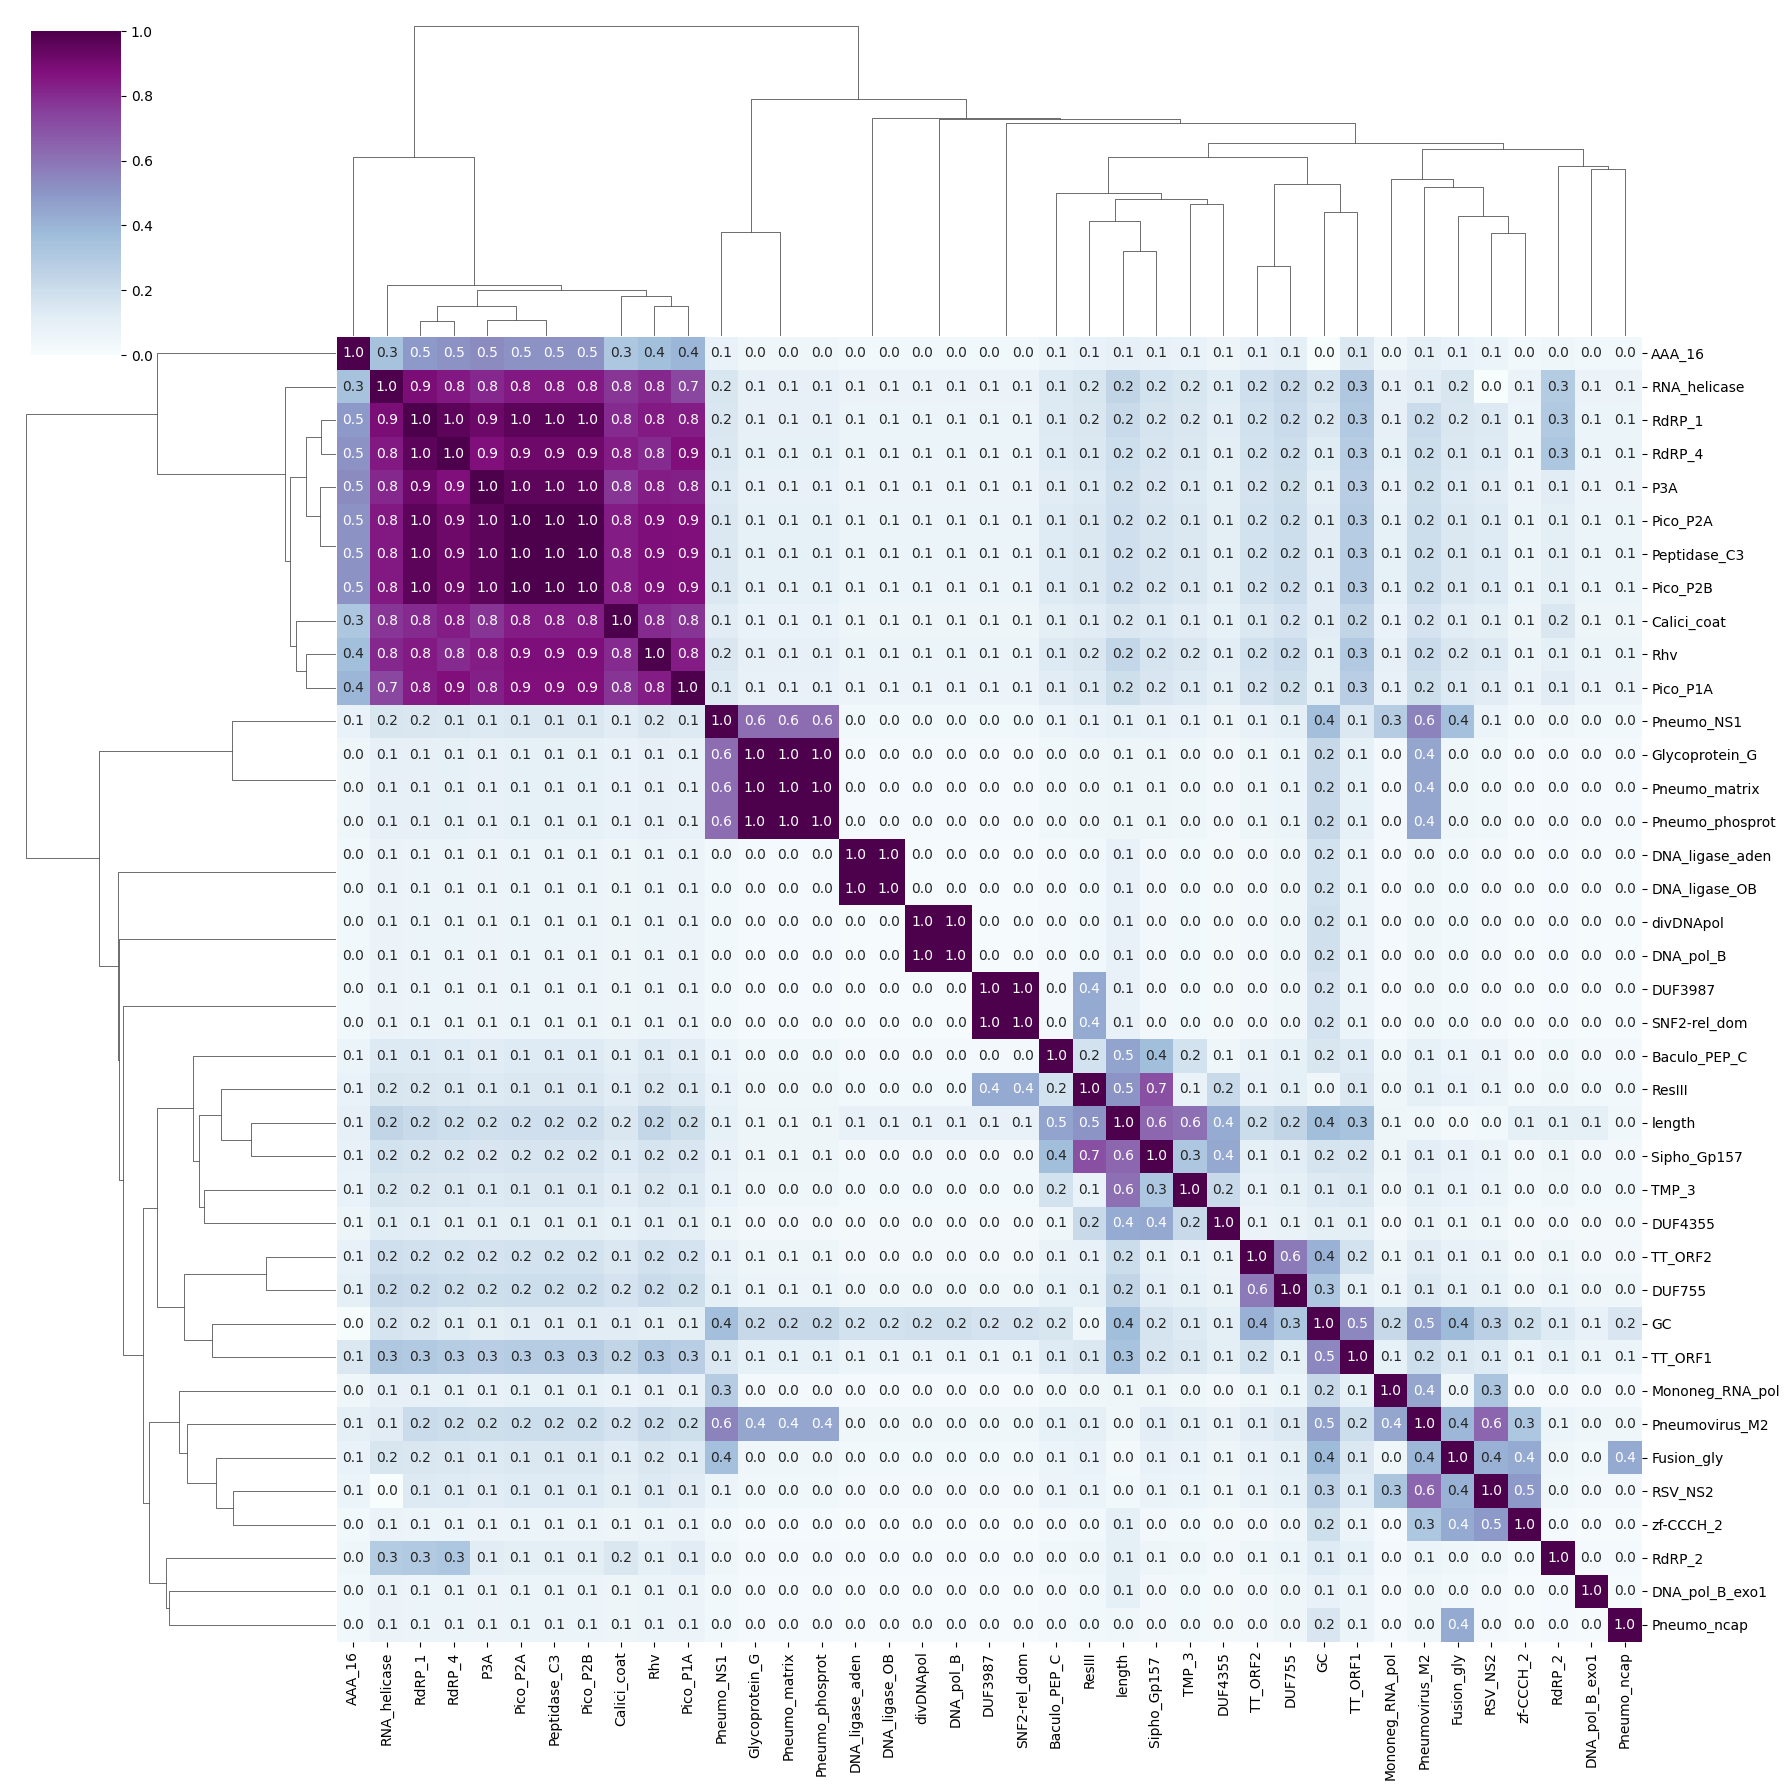

In [ ]:
sns.clustermap(X_train.corr().abs(), annot=True, fmt='.1f', cmap="BuPu", figsize=(18,18))
plt.show()

In [ ]:
#Feature Selection com LASSO

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 500]

for C in alpha:
    # Inicializar o modelo de Regressão Logística com regularização L1 (Lasso)
    model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=C)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Verificar os coeficientes
    coefficients = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Coefficient': model.coef_[0]})

    # Exibir a quantidade de features selecionadas pelo Lasso (coeficientes não nulos)
    selected_features = coefficients[coefficients['Coefficient'] != 0]['Feature']
    print(f"Para C={C}, features selecionadas: {len(selected_features)}")
    print(selected_features)

Para C=0.001, features selecionadas: 2
0    0
1    1
Name: Feature, dtype: int64
Para C=0.01, features selecionadas: 2
0    0
1    1
Name: Feature, dtype: int64
Para C=0.1, features selecionadas: 2
0    0
1    1
Name: Feature, dtype: int64
Para C=1, features selecionadas: 6
0      0
1      1
3      3
13    13
15    15
30    30
Name: Feature, dtype: int64
Para C=10, features selecionadas: 15
0      0
1      1
3      3
4      4
5      5
6      6
7      7
9      9
13    13
14    14
15    15
20    20
22    22
24    24
30    30
Name: Feature, dtype: int64
Para C=100, features selecionadas: 16
0      0
1      1
3      3
4      4
5      5
6      6
7      7
9      9
13    13
14    14
15    15
20    20
22    22
23    23
24    24
30    30
Name: Feature, dtype: int64
Para C=500, features selecionadas: 22
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
9      9
11    11
12    12
13    13
14    14
15    15
18    18
20    20
21    21
22    22
23    23
24    24
30    30
33    

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C = 1)

# Treinar o modelo
model.fit(X_train, y_train)

# Verificar os coeficientes
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})

# Exibir as features selecionadas pelo Lasso (coeficientes não nulos)
selected_features = coefficients[coefficients['Coefficient'] != 0]['Feature']
print("Features selecionadas pelo Lasso:")
print(selected_features)
print(coefficients)

Features selecionadas pelo Lasso:
0             length
1                 GC
3         Fusion_gly
13            RdRP_1
15      RNA_helicase
30    Pneumovirus_M2
Name: Feature, dtype: object
            Feature  Coefficient
0            length     0.000177
1                GC    -0.076377
2          Pico_P2A     0.000000
3        Fusion_gly    -0.530784
4   DNA_ligase_aden     0.000000
5     DNA_ligase_OB     0.000000
6         divDNApol     0.000000
7         DNA_pol_B     0.000000
8           TT_ORF2     0.000000
9           TT_ORF1     0.000000
10              P3A     0.000000
11     Peptidase_C3     0.000000
12         Pico_P2B     0.000000
13           RdRP_1    -0.548591
14              Rhv     0.000000
15     RNA_helicase    -0.291003
16           RdRP_2     0.000000
17           RdRP_4     0.000000
18         Pico_P1A     0.000000
19           AAA_16     0.000000
20   DNA_pol_B_exo1     0.000000
21          DUF3987     0.000000
22           ResIII     0.000000
23     SNF2-rel_dom

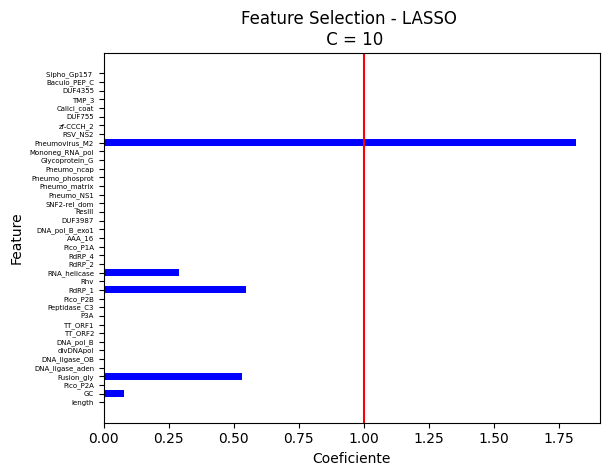

In [ ]:
model_coef = np.abs(model.coef_[0])

# plotting the Column Names and Importance of Columns.
plt.barh(names, model_coef, color = "blue")
#plt.xticks(rotation=90)
plt.title("Feature Selection - LASSO \n C = 10")
plt.xlabel("Coeficiente")
plt.yticks(fontsize = 5)
plt.ylabel("Feature")
#plt.ylim(0,0.001)
plt.axvline(1, color='r') # vertical
plt.show()

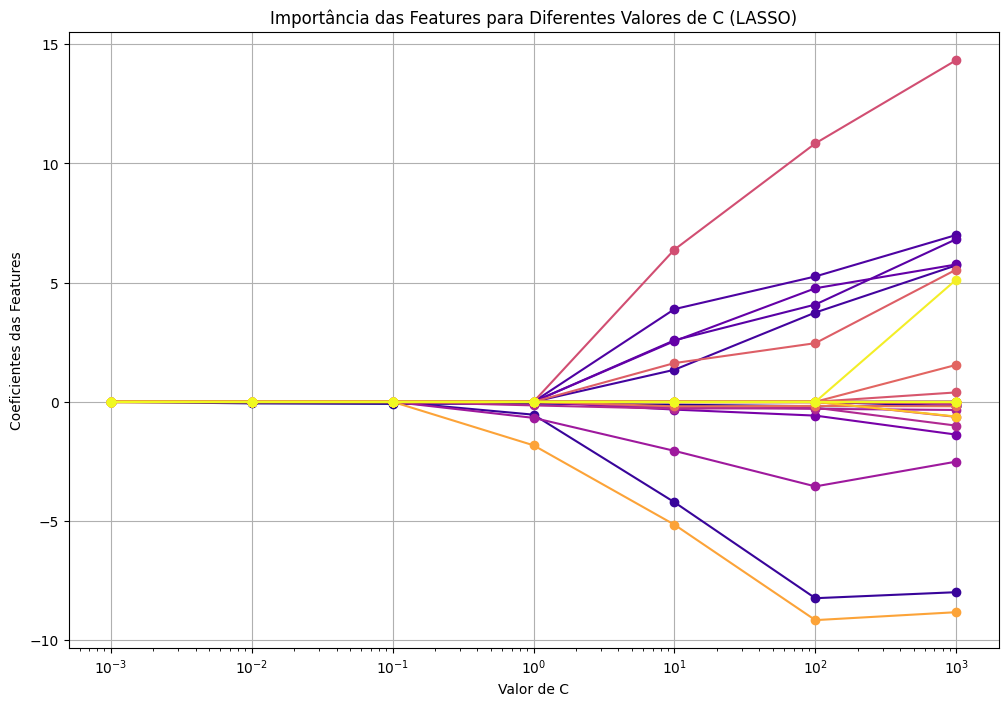

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Lista de valores de C
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Lista para armazenar os coeficientes
coef_list = []

# Nome das features (substitua pela lista real de suas features)
feature_names = X_train.columns

# Treina o modelo para cada valor de C e armazena os coeficientes
for C in alpha:
    model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=C)
    model.fit(X_train, y_train)

    # Para multi_class='ovr', cada coeficiente é uma matriz (n_classes, n_features)
    # Vamos considerar o coeficiente da primeira classe apenas para simplicidade
    coef_list.append(model.coef_[0])  # Ajuste conforme necessário para múltiplas classes

# Converte a lista para um array
coef_array = np.array(coef_list)

# Verifica se o número de features é consistente
if coef_array.shape[1] != len(feature_names):
    print(f'Erro: número de coeficientes ({coef_array.shape[1]}) não corresponde ao número de features ({len(feature_names)})')

colors = plt.cm.plasma(np.linspace(0, 1, len(feature_names)))

# Cria o gráfico
plt.figure(figsize=(12, 8))
for i in range(coef_array.shape[1]):
    plt.plot(alpha, coef_array[:, i], marker='o', label=feature_names[i], color=colors[i])

plt.xscale('log')
plt.xlabel('Valor de C')
plt.ylabel('Coeficientes das Features')
plt.title('Importância das Features para Diferentes Valores de C (LASSO)')
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


<Axes: xlabel='Pneumovirus_M2', ylabel='DNA_pol_B_exo1'>

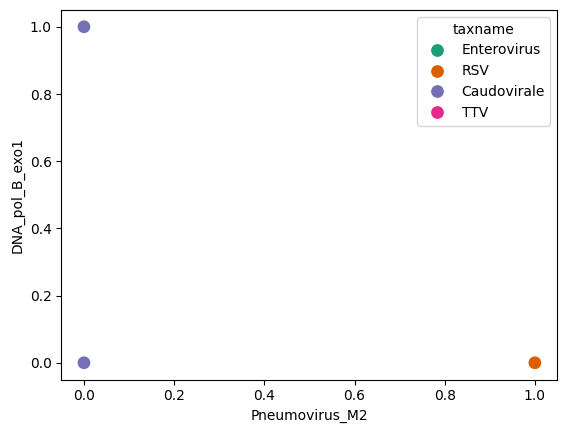

In [ ]:
sns.scatterplot(data=df, x = 'Pneumovirus_M2', y = 'DNA_pol_B_exo1',
                hue = 'taxname', marker ='o', s = 100, palette = "Dark2")

In [ ]:
# Subsetting the features which has more than 0.2 importance.
feature_subset=np.array(names)[model_coef>1]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures.
feature_subset=np.append(feature_subset, "taxname")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['Fusion_gly' 'DNA_ligase_aden' 'DNA_ligase_OB' 'divDNApol' 'DNA_pol_B'
 'RdRP_1' 'DNA_pol_B_exo1' 'ResIII' 'Pneumovirus_M2']
Selected Columns: ['Fusion_gly' 'DNA_ligase_aden' 'DNA_ligase_OB' 'divDNApol' 'DNA_pol_B'
 'RdRP_1' 'DNA_pol_B_exo1' 'ResIII' 'Pneumovirus_M2' 'taxname']


In [ ]:
df_new = df[feature_subset]
df_new.head(10)

,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,RdRP_1,DNA_pol_B_exo1,ResIII,Pneumovirus_M2,taxname
0,0,0,0,0,0,0,0,0,0,Enterovirus
1,1,0,0,0,0,0,0,0,1,RSV
2,0,1,1,0,0,0,0,0,0,Caudovirale
3,0,0,0,1,1,0,0,0,0,Caudovirale
4,0,0,0,0,0,0,0,0,0,TTV
5,0,0,0,0,0,0,0,0,0,TTV
6,0,0,0,0,0,1,0,0,0,Enterovirus
7,0,0,0,0,0,1,0,0,0,Enterovirus
8,0,0,0,0,0,0,0,0,0,Enterovirus
9,0,0,0,0,0,0,0,0,0,Enterovirus


In [ ]:
df_new.info()
df_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fusion_gly       97 non-null     int64 
 1   DNA_ligase_aden  97 non-null     int64 
 2   DNA_ligase_OB    97 non-null     int64 
 3   divDNApol        97 non-null     int64 
 4   DNA_pol_B        97 non-null     int64 
 5   RdRP_1           97 non-null     int64 
 6   DNA_pol_B_exo1   97 non-null     int64 
 7   ResIII           97 non-null     int64 
 8   Pneumovirus_M2   97 non-null     int64 
 9   taxname          97 non-null     object
dtypes: int64(9), object(1)
memory usage: 7.7+ KB


,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,RdRP_1,DNA_pol_B_exo1,ResIII,Pneumovirus_M2
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.082474,0.010309,0.010309,0.010309,0.010309,0.247423,0.010309,0.061856,0.113402
std,0.276515,0.101535,0.101535,0.101535,0.101535,0.433756,0.101535,0.242145,0.318731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X = df_new.drop("taxname", axis=1)
y = df['taxname']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (72, 9)
Shape of Test Features: (25, 9)
Shape of Train Target: (72,)
Shape of Test Target: (25,)


In [ ]:
#y_encoded = label_encoder.fit_transform(y)

<Axes: >

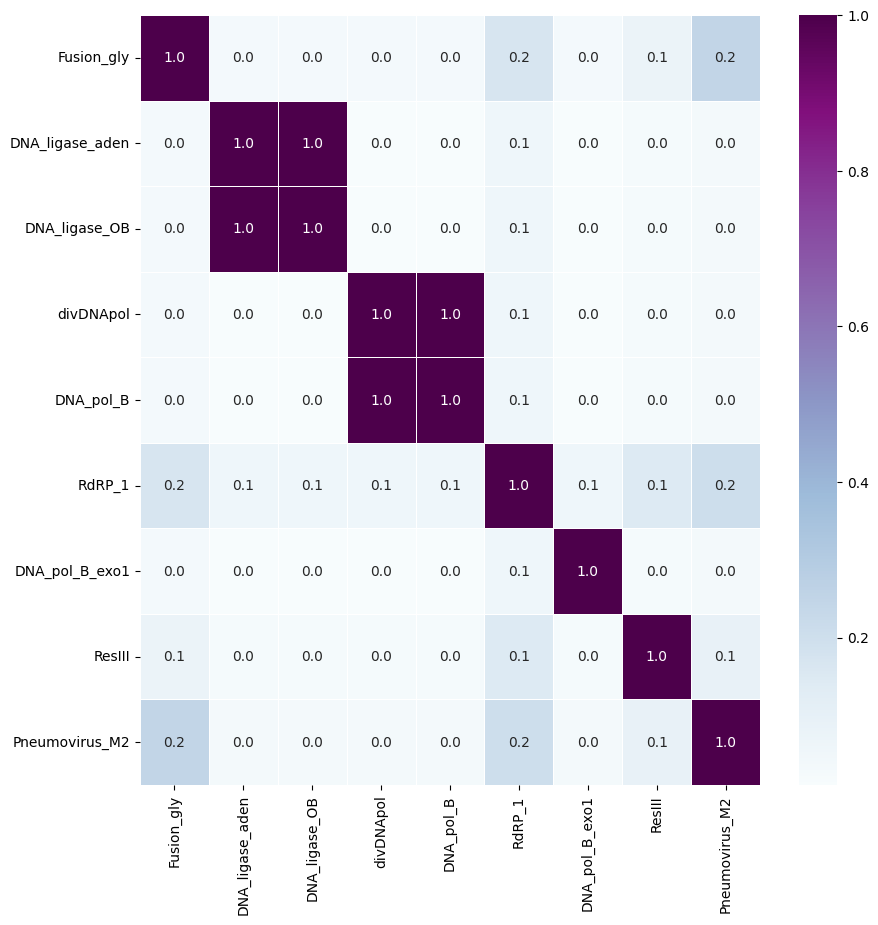

In [ ]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(X.corr().abs(), annot = True, linewidth = .5, fmt = '.1f', ax = ax,cmap="BuPu")

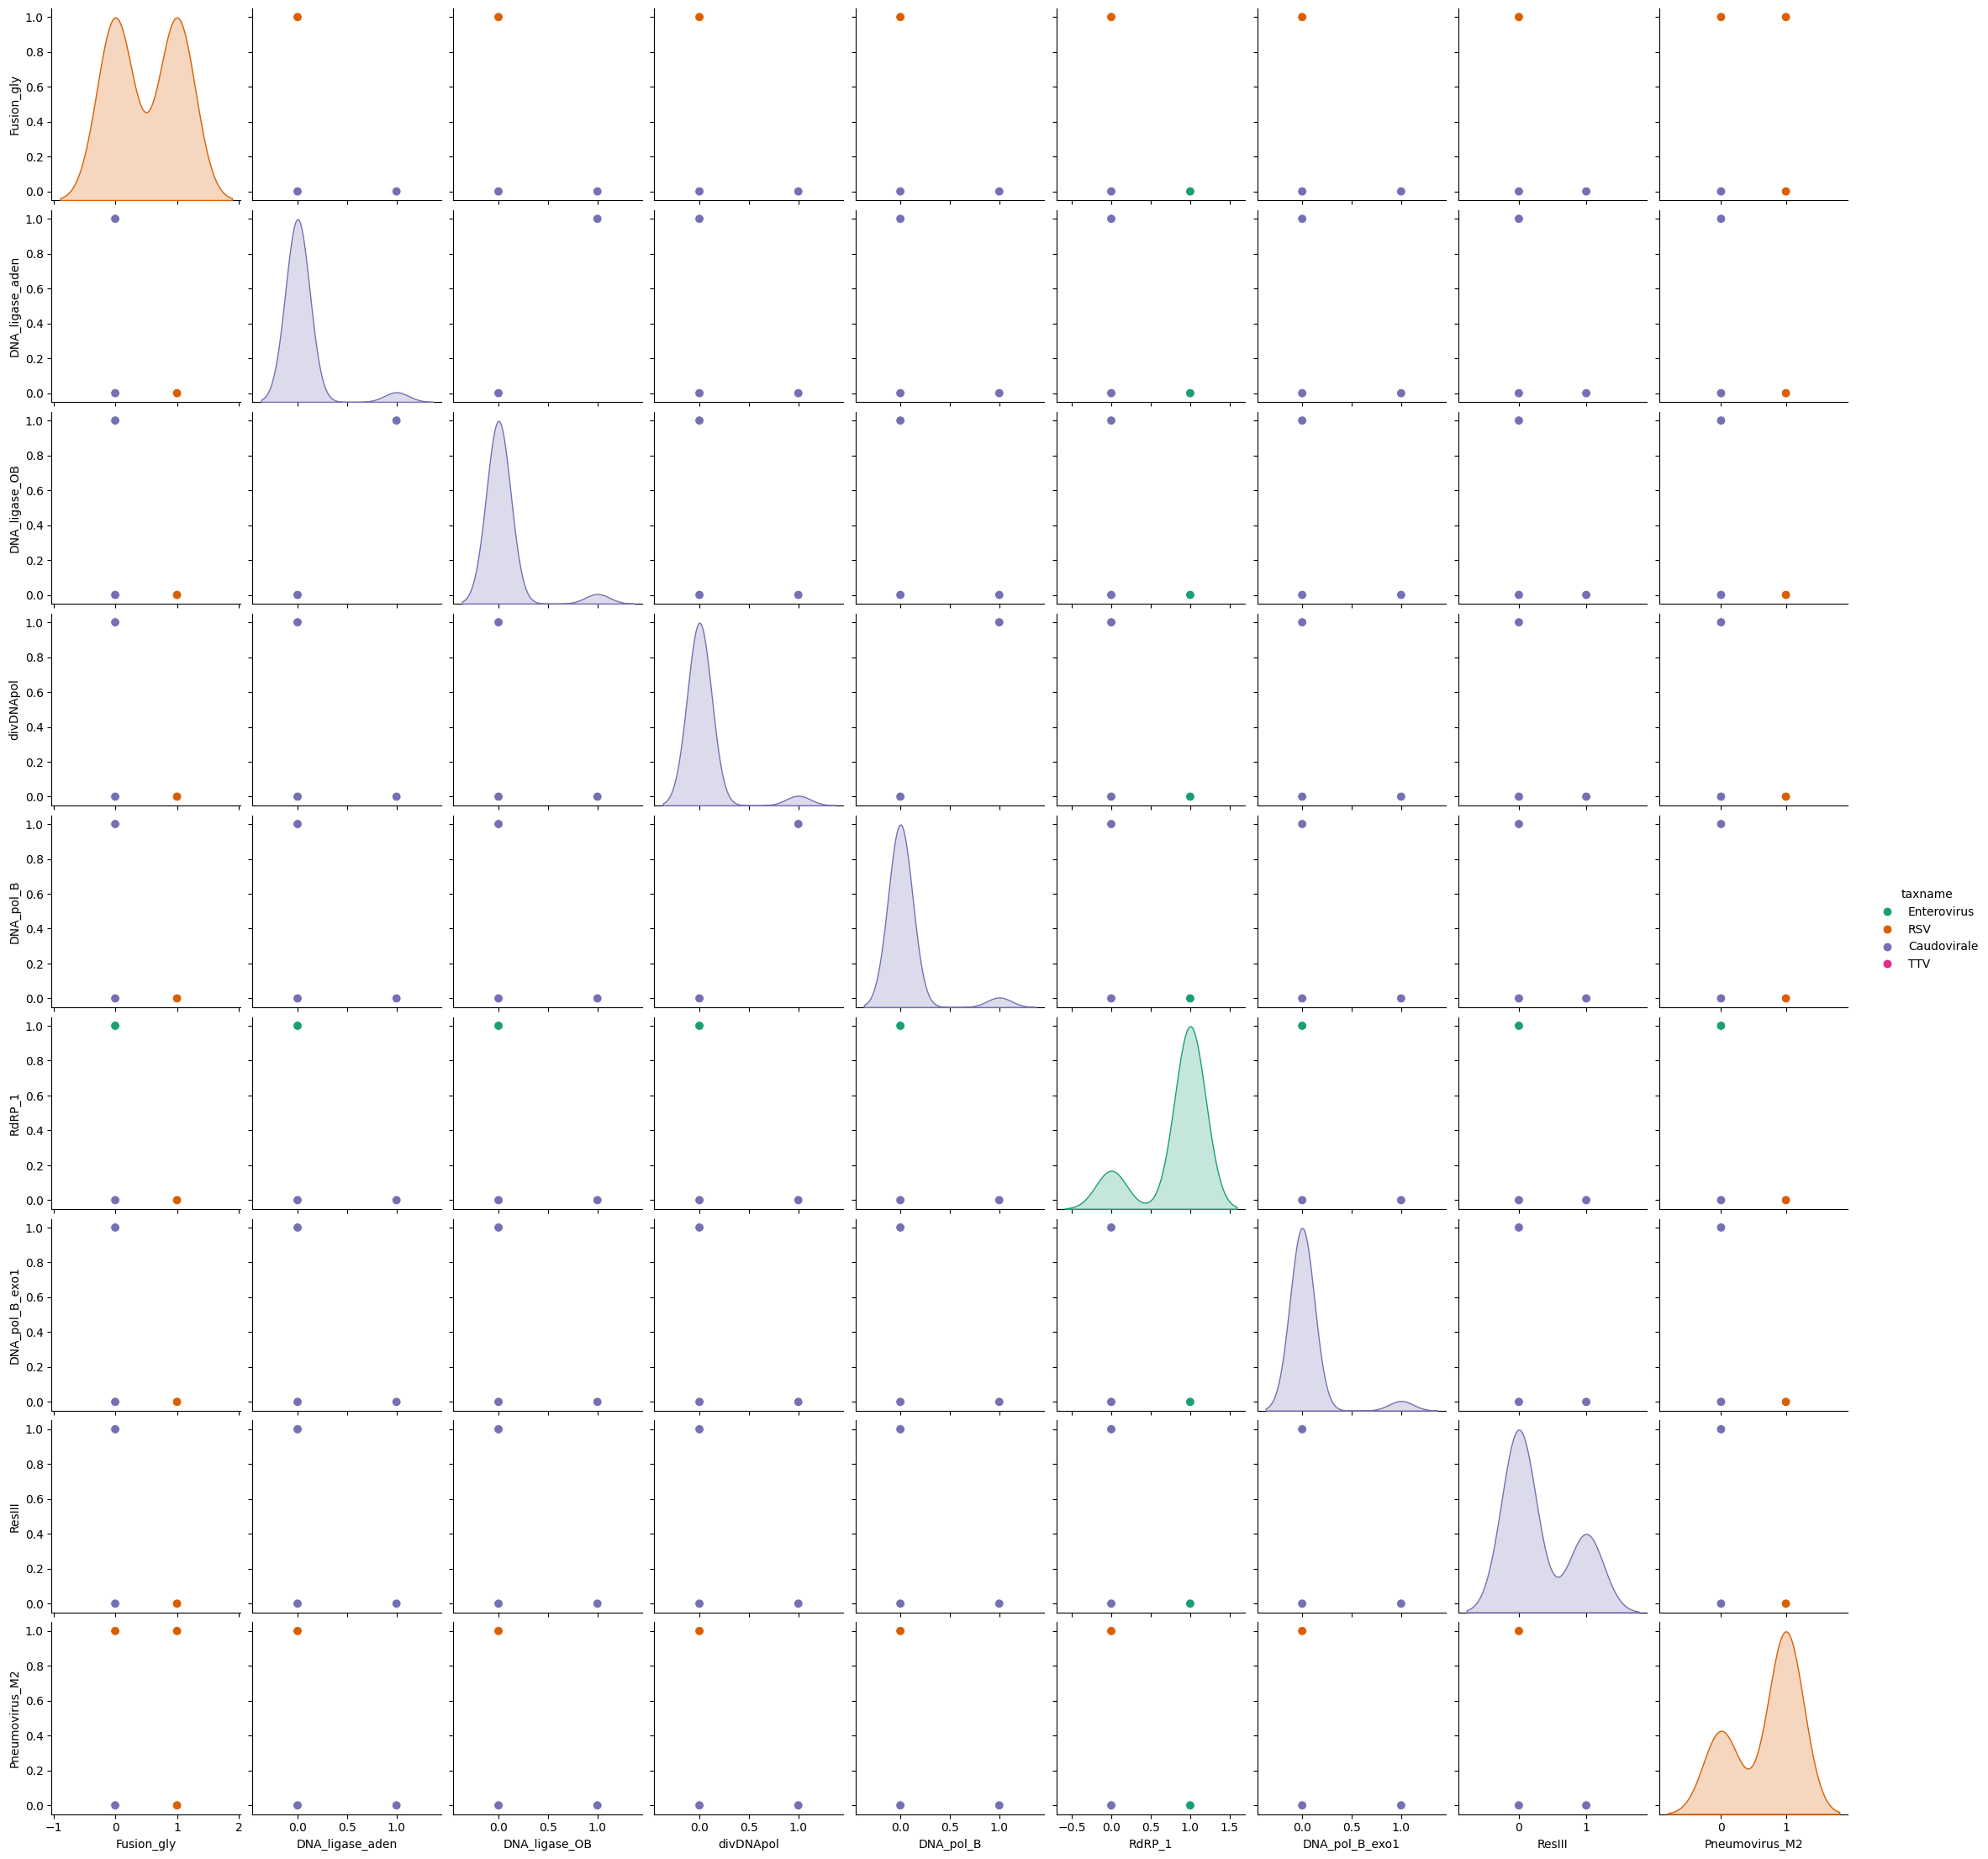

In [ ]:
colors = ["#540D6E", "#ee4266", "#FFD23F", "#9CF6F6"]
sns.set_palette(colors)

sns.pairplot(data=df_new,
             hue = 'taxname', palette="Dark2", markers = 'o', plot_kws={"s": 60})

#grr = scatter_matrix(df_new, c = y_encoded, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, pallete = 'colors')

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = NB.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['RSV' 'Enterovirus' 'TTV' 'RSV' 'TTV' 'Caudovirale' 'RSV' 'Enterovirus'
 'TTV' 'TTV' 'TTV' 'TTV' 'Enterovirus' 'Enterovirus' 'Enterovirus' 'TTV'
 'RSV' 'Enterovirus' 'TTV' 'TTV' 'TTV' 'TTV' 'RSV' 'TTV' 'Enterovirus']


In [ ]:
len(y_pred)

25

In [ ]:
print("Test set score: {:.2f}".format(NB.score(X_train, y_train)))

Test set score: 0.85


In [ ]:
target_names = y_test.unique()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Caudovirale       1.00      0.25      0.40         4
 Enterovirus       1.00      0.78      0.88         9
         RSV       1.00      1.00      1.00         5
         TTV       0.58      1.00      0.74         7

    accuracy                           0.80        25
   macro avg       0.90      0.76      0.75        25
weighted avg       0.88      0.80      0.79        25



In [ ]:
labels = set(y_test)  # Todas as classes presentes

# Inicializando dicionários para armazenar métricas por classe
accuracy_per_class = {}
mcc_per_class = {}

for label in labels:
    # Converting the problem to binary: positive (current class) vs negative (all other classes)
    y_test_bin = [1 if y == label else 0 for y in y_test]
    y_pred_bin = [1 if y == label else 0 for y in y_pred]

    # Calculando acurácia para a classe atual
    accuracy_per_class[label] = accuracy_score(y_test_bin, y_pred_bin)

    # Calculando MCC para a classe atual
    mcc_per_class[label] = matthews_corrcoef(y_test_bin, y_pred_bin)

# Exibindo resultados
print("Acurácia por Classe:")
for label, acc in accuracy_per_class.items():
    print(f"Classe {label}: {acc:.4f}")

print("\nMCC por Classe:")
for label, mcc in mcc_per_class.items():
    print(f"Classe {label}: {mcc:.4f}")

Acurácia por Classe:
Classe RSV: 1.0000
Classe Enterovirus: 0.9200
Classe TTV: 0.8000
Classe Caudovirale: 0.8800

MCC por Classe:
Classe RSV: 1.0000
Classe Enterovirus: 0.8315
Classe TTV: 0.6491
Classe Caudovirale: 0.4677


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


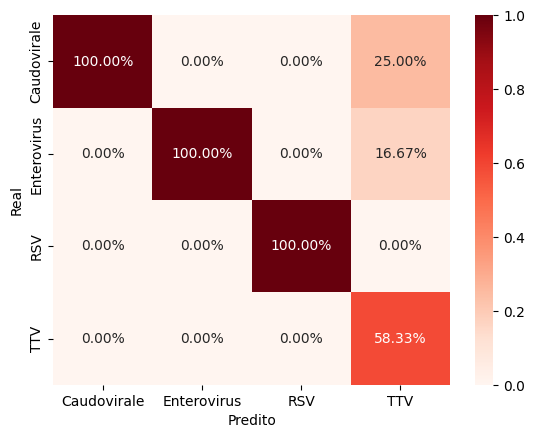

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = "Real"

df_cm.columns.name = "Predito"

sns.heatmap(df_cm/np.sum(df_cm), annot=True, cmap="Reds",fmt='.2%')
plt.show()

Rótulos reais: Index(['Caudovirale', 'Enterovirus', 'RSV', 'TTV'], dtype='object')
Rótulos preditos: Index(['Caudovirale', 'Enterovirus', 'RSV', 'TTV'], dtype='object')
             Caudovirale  Enterovirus  RSV  TTV
Caudovirale            1            0    0    3
Enterovirus            0            7    0    2
RSV                    0            0    5    0
TTV                    0            0    0    7


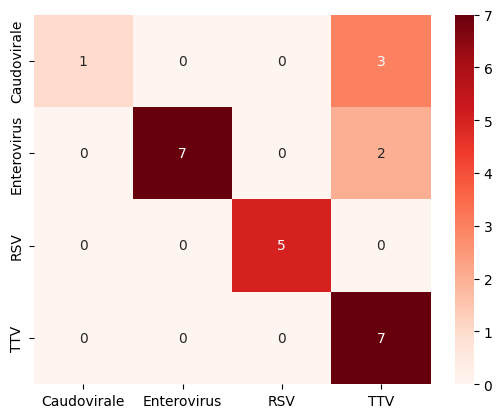

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Obter os rótulos únicos
labels = np.unique(y_test)

# Criar o DataFrame
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Verificar os rótulos e a matriz
print("Rótulos reais:", df_cm.index)
print("Rótulos preditos:", df_cm.columns)
print(df_cm)

# Plotar a matriz de confusão
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='d')
plt.show()


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)

# Avaliar o desempenho
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

f1 = f1_score(y_test, y_test_pred, average = 'weighted')
precision = precision_score(y_test,y_test_pred, average= 'weighted')
recall = recall_score(y_test,y_test_pred, average= 'weighted')
mcc = matthews_corrcoef(y_test, y_test_pred)

print(f'Acurácia no conjunto de treino: {accuracy_train}')
print(f'Acurácia no conjunto de teste: {accuracy_test}')
print(f'F1 no conjunto de teste: {f1:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Revocação no conjunto de teste: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia no conjunto de treino: 0.8472222222222222
Acurácia no conjunto de teste: 0.8
F1 no conjunto de teste: 0.79
Precisão no conjunto de teste: 0.88
Revocação no conjunto de teste: 0.8
Coeficiente de Correlação de Mattwes: 0.75


In [ ]:
#metrics.plot_roc_curve(NB, X_test, y_test)

In [ ]:
#Com ruído
test = pd.read_excel('/content/drive/My Drive/DarkMatter/test_set.xlsx')
test.head()


,taxname,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,...,Mononeg_RNA_pol,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157
0,RSV,247,31.66,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,RSV,247,30.77,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,RSV,1068,34.65,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Caudovirale,4835,35.74,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RSV,157,34.43,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
test = test[feature_subset]
test.head()

,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,RdRP_1,DNA_pol_B_exo1,ResIII,Pneumovirus_M2,taxname
0,1,0,0,0,0,0,0,0,0,RSV
1,1,0,0,0,0,0,0,0,0,RSV
2,1,0,0,0,0,0,0,0,0,RSV
3,0,0,0,0,0,0,0,1,0,Caudovirale
4,0,0,0,0,0,0,0,0,1,RSV


In [ ]:
X_mundo = test.drop("taxname", axis = 1).values
y_mundo = test['taxname'].values

#y_mundo

Text(0, 0.5, 'Contagem')

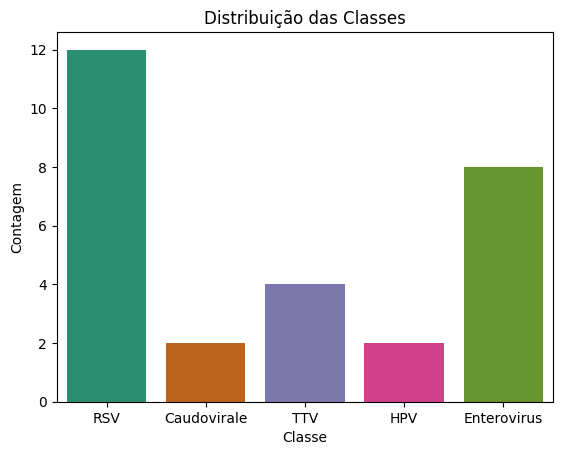

In [ ]:
#Distribuição das Classes no conjunto Teste do Mundo ruidoso

sns.countplot(data=test, x = 'taxname', hue = 'taxname', palette="Dark2")
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Contagem")

In [ ]:
y_pred_mundo = NB.predict(X_mundo)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


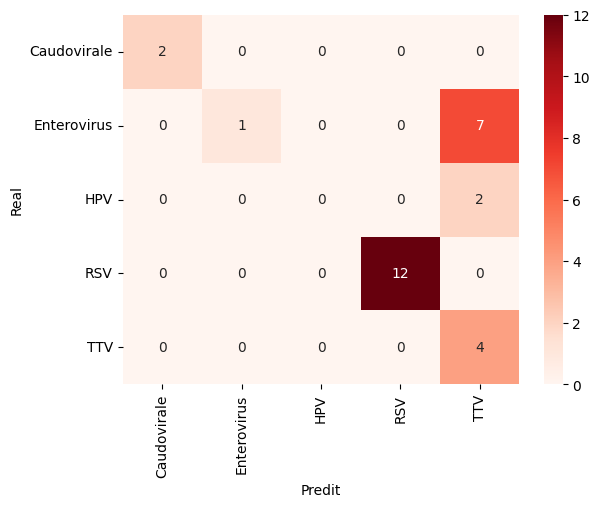

In [ ]:
cm = confusion_matrix(y_mundo,y_pred_mundo)

df_cm = pd.DataFrame(cm, columns=np.unique(y_mundo),index = np.unique(y_mundo))

df_cm.index.name = "Real"

df_cm.columns.name = "Predit"

sns.heatmap(df_cm, annot=True, cmap = "Reds")
plt.show()
#df_cm

In [ ]:
from sklearn.metrics import *

# Avaliar o desempenho

accuracy = accuracy_score(y_mundo, y_pred_mundo)
f1 = f1_score(y_mundo, y_pred_mundo, average = 'weighted')
precision = precision_score(y_mundo,y_pred_mundo, average= 'weighted')
recall = recall_score(y_mundo,y_pred_mundo, average= 'weighted')
mcc = matthews_corrcoef(y_mundo, y_pred_mundo)

print(f'Acurácia no conjunto de teste: {accuracy:.2f}')
print(f'F1 no conjunto de teste: {f1:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Revocação no conjunto de teste: {recall:.2f}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia no conjunto de teste: 0.68
F1 no conjunto de teste: 0.63
Precisão no conjunto de teste: 0.83
Revocação no conjunto de teste: 0.68
Coeficiente de Correlação de Mattwes: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
